<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/file%20skripsinya%20fara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [25]:
from PIL import Image

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

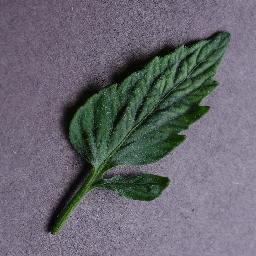

In [38]:
img = Image.open('/content/D4.jpg')
img

In [39]:
img.size

(256, 256)

In [40]:
img_array = np.array(img)
img_array

array([[[ 92,  79,  97],
        [104,  91, 109],
        [105,  92, 110],
        ...,
        [129, 120, 139],
        [134, 125, 144],
        [144, 135, 154]],

       [[ 92,  79,  97],
        [103,  90, 108],
        [105,  92, 110],
        ...,
        [134, 125, 144],
        [131, 122, 141],
        [132, 123, 142]],

       [[ 90,  77,  95],
        [100,  87, 105],
        [102,  89, 107],
        ...,
        [131, 122, 141],
        [129, 120, 139],
        [131, 122, 141]],

       ...,

       [[121, 112, 131],
        [132, 123, 142],
        [115, 106, 125],
        ...,
        [140, 132, 153],
        [143, 135, 156],
        [145, 137, 158]],

       [[106,  97, 116],
        [131, 122, 141],
        [124, 115, 134],
        ...,
        [142, 134, 155],
        [144, 136, 157],
        [146, 138, 159]],

       [[136, 127, 146],
        [115, 106, 125],
        [113, 104, 123],
        ...,
        [143, 135, 156],
        [145, 137, 158],
        [147, 139, 160]]

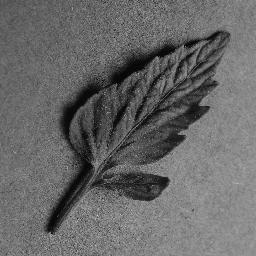

In [41]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [42]:
imgG_array = np.array(imgGray)
imgG_array

array([[ 85,  97,  98, ..., 125, 130, 140],
       [ 85,  96,  98, ..., 130, 127, 128],
       [ 83,  93,  95, ..., 127, 125, 127],
       ...,
       [117, 128, 111, ..., 137, 140, 142],
       [102, 127, 120, ..., 139, 141, 143],
       [132, 111, 109, ..., 140, 142, 144]], dtype=uint8)

In [43]:
np.min(imgG_array),np.max(imgG_array)

(0, 214)

## FIS (Fuzzy Information System)

Pada bagian ini meliputi: 
- Representasi citra grayscale ke dalam fungsi keanggotaan fuzzy
- Mengkuantifikasi ketidakpastian yang dihasilkan akibat kekurangan informasi menggunakan entropi

## MF linier naik

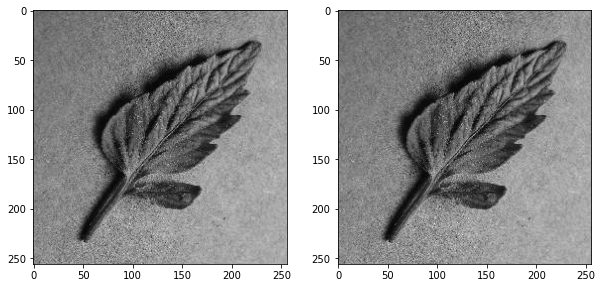

In [44]:
def fungsi_linier(x):
  a = -0.01;
  b = 214.1;
  miu = (x - a)/(b-a)
  return miu

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(imgG_array/256)
plt.subplot(122)
plt.imshow(fungsi_linier(imgG_array/256))
plt.show()

In [45]:
img_fuzzy = fungsi_linier(imgG_array)
img_fuzzy

array([[0.39703891, 0.45308486, 0.45775536, ..., 0.58385876, 0.60721125,
        0.65391621],
       [0.39703891, 0.44841437, 0.45775536, ..., 0.60721125, 0.59319976,
        0.59787025],
       [0.38769791, 0.43440288, 0.44374387, ..., 0.59319976, 0.58385876,
        0.59319976],
       ...,
       [0.54649479, 0.59787025, 0.51847181, ..., 0.63990472, 0.65391621,
        0.6632572 ],
       [0.47643735, 0.59319976, 0.56050628, ..., 0.64924571, 0.65858671,
        0.6679277 ],
       [0.61655224, 0.51847181, 0.50913082, ..., 0.65391621, 0.6632572 ,
        0.6725982 ]])

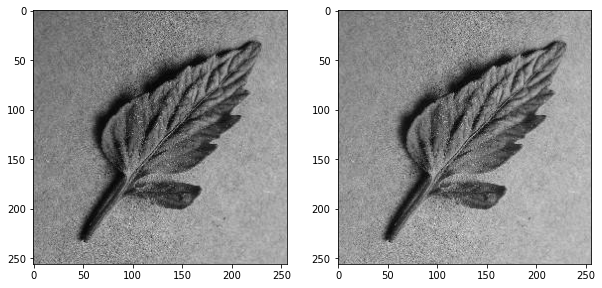

In [46]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(img_fuzzy/256)
plt.subplot(122)
plt.imshow(entropi(img_fuzzy/256))
plt.show()

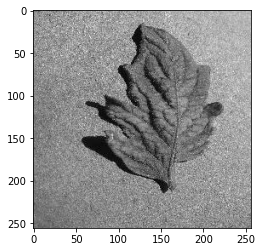

In [35]:
fig = plt.imshow(entropi(img_fuzzy/256))

In [ ]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

In [36]:
FEM = entropi(img_fuzzy)
FEM

array([[0.3935734 , 0.52262565, 0.48875071, ..., 0.40351597, 0.4131445 ,
        0.40351597],
       [0.48670899, 0.5200087 , 0.52106305, ..., 0.39692213, 0.4284782 ,
        0.43435653],
       [0.50181012, 0.49830241, 0.50181012, ..., 0.35823442, 0.38332244,
        0.38677335],
       ...,
       [0.525552  , 0.52989875, 0.530581  , ..., 0.53018536, 0.52883796,
        0.52955375],
       [0.53068879, 0.52970119, 0.52034777, ..., 0.52697318, 0.52476018,
        0.52301661],
       [0.52770544, 0.52955375, 0.53068879, ..., 0.53068879, 0.47586136,
        0.52391489]])

In [37]:
maxcr = np.max(FEM)
mincr = np.min(FEM)
avgcr = (maxcr + mincr)/2
print(maxcr, mincr, avgcr)

0.5307356987175064 0.0005721347344136987 0.26565391672596006


In [ ]:
FEM.shape, FEM.dtype

((225, 225), dtype('float64'))

## MF segitiga dan linier


## MF Sigmoid

In [ ]:
def sig(x,a,b,c):
    if x < a:
      miu = 0
    elif a < x < b:
      miu =  2. * ((x - a)** 2. / (b - a)) ** 2.
    elif b < x < c:
      miu = 1 - 2. * ((x - b) / (b - a)) ** 2.
    else:
      miu = 1
    return miu

In [ ]:
sig(2,1,5,7)

0.125

In [ ]:
def sigf(x,a,b,c):
    if x <= a:
      miu = 0
    elif a <= x <= b:
      miu =  (x - a)**2 / ((b - a)*(c - a))
    elif b <= x <= c:
      miu = 1 - ((x - c)**2) /(c - b)*(c - a)
    else:
      miu = 1
    return miu

In [ ]:
sigf(6,1,5,6)

1.0

# K-Means Klastering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [ ]:
image = cv2.imread('/content/Screenshot 2022-07-29 at 20.32.39.png')
print(image.dtype, image.shape)

uint8 (434, 434, 3)


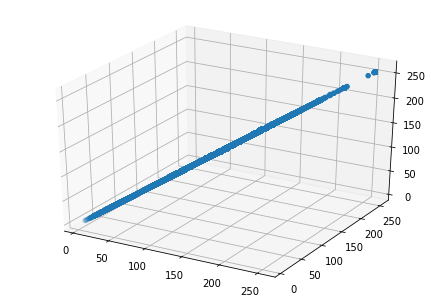

In [ ]:
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [ ]:
pixel_vals = fig.reshape((-1,2))
print(pixel_vals.dtype, pixel_vals.shape)

AttributeError: ignored

In [ ]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

NameError: ignored

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [0]
 [0]
 ...
 [1]
 [2]
 [2]]


In [ ]:
print(center)

[[ 74.90644  74.90644  74.90644]
 [149.93405 149.93405 149.93405]
 [124.82388 124.82388 124.82388]]


In [ ]:
center = np.uint8(center)
center

array([[ 74,  74,  74],
       [149, 149, 149],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

array([[149, 149, 149],
       [ 74,  74,  74],
       [ 74,  74,  74],
       ...,
       [149, 149, 149],
       [124, 124, 124],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[149, 149, 149],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [149, 149, 149]],

       ...,

       [[124, 124, 124],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [124, 124, 124]]

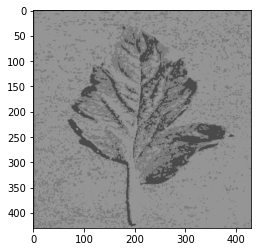

In [ ]:
plt.imshow(segmented_image)

In [ ]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa 

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

ValueError: ignored